<a href="https://colab.research.google.com/github/ociragan/AIHub_DL_SummerCamp_Group4_alltogether/blob/main/Urban_Sounds_Classification_Part5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
listX = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']
listy = ['y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10']

In [ ]:
X1 = np.load("/content/drive/MyDrive/UrbanSound8K/data/X1.npy")
X2 = np.load("/content/drive/MyDrive/UrbanSound8K/data/X2.npy")
X3 = np.load("/content/drive/MyDrive/UrbanSound8K/data/X3.npy")
X4 = np.load("/content/drive/MyDrive/UrbanSound8K/data/X4.npy")
X5 = np.load("/content/drive/MyDrive/UrbanSound8K/data/X5.npy")
X6 = np.load("/content/drive/MyDrive/UrbanSound8K/data/X6.npy")
X7 = np.load("/content/drive/MyDrive/UrbanSound8K/data/X7.npy")
X8 = np.load("/content/drive/MyDrive/UrbanSound8K/data/X8.npy")
X9 = np.load("/content/drive/MyDrive/UrbanSound8K/data/X9.npy")
X10 = np.load("/content/drive/MyDrive/UrbanSound8K/data/X10.npy")

In [ ]:
y1 = np.load("/content/drive/MyDrive/UrbanSound8K/data/y1.npy")
y2 = np.load("/content/drive/MyDrive/UrbanSound8K/data/y2.npy")
y3 = np.load("/content/drive/MyDrive/UrbanSound8K/data/y3.npy")
y4 = np.load("/content/drive/MyDrive/UrbanSound8K/data/y4.npy")
y5 = np.load("/content/drive/MyDrive/UrbanSound8K/data/y5.npy")
y6 = np.load("/content/drive/MyDrive/UrbanSound8K/data/y6.npy")
y7 = np.load("/content/drive/MyDrive/UrbanSound8K/data/y7.npy")
y8 = np.load("/content/drive/MyDrive/UrbanSound8K/data/y8.npy")
y9 = np.load("/content/drive/MyDrive/UrbanSound8K/data/y9.npy")
y10 = np.load("/content/drive/MyDrive/UrbanSound8K/data/y10.npy")

In [ ]:
X_train = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8), axis=0)
X_test = X9
X_val = X10

In [ ]:
print(f"X_train shape is: {X_train.shape}")
print(f"X_test shape is: {X_test.shape}")
print(f"X_val shape is: {X_val.shape}")

X_train shape is: (7079, 50, 50)
X_test shape is: (816, 50, 50)
X_val shape is: (837, 50, 50)


In [ ]:
y_train = np.concatenate((y1, y2, y3, y4, y5, y6, y7, y8), axis=0)
y_test = y9
y_val = y10

In [ ]:
print(f"y_train shape is: {y_train.shape}")
print(f"y_test shape is: {y_test.shape}")
print(f"y_val shape is: {y_val.shape}")

y_train shape is: (7079,)
y_test shape is: (816,)
y_val shape is: (837,)


In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))
print(np.unique(y_val, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([800, 364, 800, 800, 800, 818, 311, 822, 764, 800]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([100,  32, 100, 100, 100,  89,  31,  82,  82, 100]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([100,  33, 100, 100, 100,  93,  32,  96,  83, 100]))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X_train.reshape(X_train.shape[0],50,50,1)
X_test.reshape(X_test.shape[0],50,50,1)
X_val.reshape(X_val.shape[0],50,50,1)

array([[[[0.00392157],
         [0.00784314],
         [0.01960784],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.40784314],
         [0.40784314],
         [0.41960784],
         ...,
         [0.44705882],
         [0.44705882],
         [0.4627451 ]],

        [[0.24313725],
         [0.25490196],
         [0.29019608],
         ...,
         [0.38431373],
         [0.38431373],
         [0.39215686]],

        [[0.12156863],
         [0.13333333],
         [0.16470588],
         ...,
         [0.19607843],
         [0.19607843],
         [0.18823529]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [ ]:
input_dim = (50,50,1)
earlystopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=3)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), activation = "relu", strides=(1,1), padding="same", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), strides=(1,1), padding="same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), strides=(1,1), padding="same", activation = "relu"))
model.add(Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
results = model.fit(X_train, y_train, epochs = 50, batch_size = 128, validation_data = (X_val, y_val), callbacks=[earlystopping])

Epoch 1/50
56/56 [==============================] - 2s 21ms/step - loss: 2.1457 - accuracy: 0.1955 - val_loss: 1.8088 - val_accuracy: 0.4086
Epoch 2/50
56/56 [==============================] - 1s 15ms/step - loss: 1.8225 - accuracy: 0.3187 - val_loss: 1.5891 - val_accuracy: 0.4683
Epoch 3/50
56/56 [==============================] - 1s 15ms/step - loss: 1.6417 - accuracy: 0.3879 - val_loss: 1.4720 - val_accuracy: 0.4863
Epoch 4/50
56/56 [==============================] - 1s 14ms/step - loss: 1.5039 - accuracy: 0.4465 - val_loss: 1.3771 - val_accuracy: 0.4922
Epoch 5/50
56/56 [==============================] - 1s 15ms/step - loss: 1.4051 - accuracy: 0.4946 - val_loss: 1.2761 - val_accuracy: 0.5639
Epoch 6/50
56/56 [==============================] - 1s 15ms/step - loss: 1.2989 - accuracy: 0.5369 - val_loss: 1.2231 - val_accuracy: 0.6022
Epoch 7/50
56/56 [==============================] - 1s 15ms/step - loss: 1.2041 - accuracy: 0.5764 - val_loss: 1.1563 - val_accuracy: 0.6117
Epoch 8/50
56

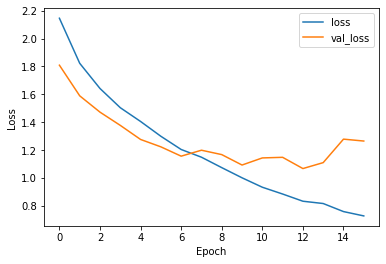

In [ ]:
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [ ]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, y_test)
print(score)

26/26 [==============================] - 0s 4ms/step - loss: 1.2795 - accuracy: 0.7145
[1.2794770002365112, 0.7144607901573181]
